<a href="https://colab.research.google.com/github/bnf99/FiscaComputacional1/blob/main/Tarea_TS04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea semana 4: Ecuaciones Diferenciales Ordinarias.
## IF4702 - Física computacional 1 

### Profesores:
> José Esteban Pérez Hidalgo  
> Álvaro Amador Jara

### Estudiante:
> Bryam Gerardo Núñez Flores (2018111986)

### Repositorio:
> [github.com/bnf99/FiscaComputacional1](https://github.com/bnf99/FiscaComputacional1)

# Descripción de la tarea:

Determinar numéricamente la función que describe la variación de la presión con
la altura sobre el nivel del mar, considerando incluso la variación de la temperatura con la altura, utilizando Runge-Kutta de cuarto orden (RK4) y luego con alguna de las implementaciones de Runge-Kutta en
la biblioteca Sci.

Programe todo el código respectivo en Python y utilícelo para encontrar numéricamente la solución de la presión en función de la altura sobre el nivel del mar, desde $y = 0 m$ hasta $y = 3000m$, separados cada $100.0m$.
Considere que M = 28.9647 $g/mol$, que R = 8.314 462 $\frac{J}{K\cdot mol}$
y que $g = 9.8 m/s^{2}$.

# Teoría:

La variación de la presión atmosférica ($p$) con la altura sobre el nivel del mar ($y$) se puede modelar considerando una sección rectangular de la atmósfera, que está sujeta a una diferencia de presión en sus caras superior e inferior, que la lleva a estar en equilibrio con su peso. En términos de la densidad de la atmósfera en función de la altura $\rho(y)$ , se encuentra que:

$$
\frac {dp(y)}{dy}=-\rho(y)g
$$

La relación entre la densidad de la atmósfera con la altura se puede estimar considerando que el aire se comporta como un gas ideal, de masa molar $M$ a una temperatura $T(y)$, y se llega a obtener que:

$$
\rho(y)= \frac {M}{RT(y)}p(y)
$$

Se conoce que la disminución de la temperatura con la altura sobre el nivel del mar es de aproximadamente 1.0 °C por cada 200 m de incremento de altura, por lo que si la temperatura a nivel del mar es 20.0 °C (o 293.0 K) se tiene que:

$$
T(y)=293K - \frac {y}{200m}
$$

Utilizando como condición inicial que $p(0) = 101 325.0 Pa.$

## Solución Analítica 

Para resolver este problema de forma anaítica se sigue con:

$$
\frac {dp(y)}{dy}=-\rho(y)g= - \frac {M}{R\left(293K - \frac {y}{200m}\right)}p(y)g
$$

$$
\frac {dp(y)}{dy}= - \frac {200mMg}{R\left(58600Km - y\right)}p(y)
$$

Sea $a= \frac {200Mg}{R}$ y $b=58600Km$ entonces se tiene:

$$\frac {dp(y)}{dy}= -\frac{a}{b-y}p(y)$$

$$\frac {dp}{p}= -\frac{a}{b-y}dy $$

$$ln|p|=ln|b-y|^{a}+C_{1}$$

$$p=C_{2}(b-y)^{a}$$

Utilizando las condiciones iniciales del problema:

$$p_{0}=C_{2}b^{a}\Rightarrow C_{2}=\frac{p_{0}}{b^{a}}$$

Por ende:

$$p(y)=\frac{p_{0}}{b^{a}}(b-y)^{a}=p_{0}\left (1-\frac{y}{b}\right)^{a}$$

$$p(y)=p_{0}\left (1-\frac{y}{58600Km}\right)^{\frac {200mMg}{R}}$$

## Solución Numérica

Se desea implementar el método de Runge-Kutta de cuarto orden (RK4), el cúal para un problema bien propuesto de valores iniciales sigue que:

$\frac{dy}{dt}=f(t,y)$, para $a\le t \le b$, dado $y(a)=\alpha$

donde para un proceso iterativo de $N$ pasos se tiene que:

> $h=(b-a)/N$

> $y(t+h)=y(t)+\frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})$

>$k_{1}=hf(y,t)$

>$k_{2}=hf(y+\frac{k_{1}}{2},t+\frac{h}{2})$

>$k_{3}=hf(y+\frac{k_{2}}{2},t+\frac{h}{2})$

>$k_{4}=hf(y+k_{3},t+h)$

En específico se sabe que:

1. $h=100m$
2.$a=0$ y $b=3000$
3. $p(0)=101325Pa$
4. $\frac {dp(y)}{dy}= - \frac {Mg}{R\left(293K - \frac {y}{200m}\right)}p(y)=f(p,y)$




# Primera parte, RK4.
## Pseudocódigo:

Se busca implementar el método RK4 para resolver el problema plantéado en la sección **"Descripción de la tarea"**. 

Por lo que se implementa lo descrito en la **"Solución numérica"**. Para esto se realiza:
1. Importan las librerías necesarias.
2. Luego crea una sección donde se define las constantes del problema como $R$, $g$, $M$ etc. 
3. Se define una función que describa:
>> $\frac {dp(y)}{dy}= - \frac {Mg}{R\left(293K - \frac {y}{200m}\right)}p(y)=f(p,y)$
4. Una función que realice los cálculos de $RK4$ ($k_{1},k_{2}, p(y+h)$, etc.)

In [28]:
"""
Librerías utilizadas 
"""
import numpy as np
from scipy import constants as cte
from scipy import integrate as ode
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
"""
Constantes del problema
"""
cte_R = 8.314462
cte_g = 9.8
masa_M = 28.9647/1000
p_Ini = 101325.0
y_Ini = 0
y_Final = 3000
t_Ini = 293.0
dismi_T = 200.0 
h = 100
intervalo_y = np.arange(y_Ini,y_Final+h,h)


In [3]:
def Der_Presion (y,P):
  """
  Función que describe la derivada de la presión con respecto a la altura.
  """
  temp = t_Ini - y/dismi_T
  f_yp = -1*(masa_M*cte_g*P)/(cte_R*temp)
  return f_yp

In [4]:
def RK4(f,intervalo_y,p_Ini):
  """
  Función que realiza la aproximación con RK4.
  """
  p = [p_Ini]
  for i in range(len(intervalo_y)-1):
    k1 = h*Der_Presion(intervalo_y[i],p[i])
    k2 = h*Der_Presion(intervalo_y[i]+k1/2,p[i]+h/2)
    k3 = h*Der_Presion(intervalo_y[i]+k2/2,p[i]+h/2)
    k4 = h*Der_Presion(intervalo_y[i]+k3,p[i]+h)
    p_i = p[i] + (k1+2*k2+2*k3+k4)/6
    p.append(p_i)
  return np.array(p)


In [12]:
rk4 = RK4(Der_Presion,intervalo_y,p_Ini)
print(rk4)

[101325.         100155.46859281  98997.36116441  97850.58728256
  96715.05704571  95590.68108132  94477.37054408  93375.03711422
  92283.59299578  91202.95091486  90133.02411792  89073.72636999
  88024.97195293  86986.67566372  85958.75281268  84941.1192217
  83933.69122252  82936.38565492  81949.11986498  80971.81170331
  80004.37952328  79046.74217921  78098.81902465  77160.52991054
  76231.79518346  75312.53568382  74402.67274411  73502.12818705
  72610.82432384  71728.68395233  70855.63035525]


# Segunda parte, RK45 (Scipy).

## Pseudocódigo:

Se solicita implementar alguno de los métodos Runge-Kutta de la biblioteca Scipy. Para esto lo único que se necesita es brindar a la función *solve_ivp* los siguientes argumentos:
1. La ecuacción $\frac {dp(y)}{dy}=f(p,y)$ (previamente definida).
2. El intervalo de valores a evaluar ($a$ y $b$, previamente definidos).
3. La condición inicial. 
4. El método a utilizar (RK45).
5. El intervalo de alturas a utilizar ($a+ih$, donde $i=1,2,3...N$)


In [6]:
rk45 = ode.solve_ivp(Der_Presion,[y_Ini,y_Final],[p_Ini], method="RK45", t_eval=intervalo_y)
print(rk45.y[0])


[101325.         100150.23522929  98987.1157114   97835.54567531
  96695.42997084  95566.67405408  94449.18398737  93342.86636304
  92247.62623108  91163.37121398  90090.01075466  89027.45478951
  87975.61374837  86934.39855454  85903.72062477  84883.49186927
  83873.62469172  82874.03198925  81884.62715242  80905.3240653
  79936.03710537  78976.68114358  78027.17154436  77087.42416556
  76157.35535851  75236.881968    74325.92133226  73424.39128299
  72532.21014535  71649.29673793  70775.57037281]


# Tercera parte, porcentajes de error.

En esta sección se implementa los resultados verdaderos siguiendo la solución analítica previamente propuesta, esto con el fin de poder calcular el porcentaje de error y poder emitir un criterio sobre los resultados obtenidos.

In [7]:
def Presion(y):
  """
  Función que describe el cambio de la presión con la altura.
  """
  a = 58600
  c = 200*masa_M*cte_g/cte_R
  return p_Ini*(1-y/a)**c


In [8]:
def DatosVerdaderos(intervalo_y,presion):
  """
  Función que permite calcular el valor real de la presión.
  """
  datos = []
  for i in range(len(intervalo_y)):
    dato_i = Presion(intervalo_y[i])
    datos.append(dato_i)
  return intervalo_y,np.array(datos)

            Valor            RK4  %Error RK4           RK45   %Error RK45
0   101325.000000  101325.000000    0.000000  101325.000000  0.000000e+00
1   100150.235232  100155.468593    0.005226  100150.235229  2.267681e-09
2    98987.115737   98997.361164    0.010350   98987.115711  2.551021e-08
3    97835.545722   97850.587283    0.015374   97835.545675  4.756416e-08
4    96695.430020   96715.057046    0.020298   96695.429971  5.037961e-08
5    95566.674085   95590.681081    0.025121   95566.674054  3.237939e-08
6    94449.183993   94477.370544    0.029843   94449.183987  6.261260e-09
7    93342.866436   93375.037114    0.034465   93342.866363  7.834977e-08
8    92247.628719   92283.592996    0.038987   92247.626231  2.697345e-06
9    91163.378759   91202.950915    0.043408   91163.371214  8.276556e-06
10   90090.025080   90133.024118    0.047729   90090.010755  1.590113e-05
11   89027.476811   89073.726370    0.051950   89027.454790  2.473554e-05
12   87975.643683   88024.971953    0.

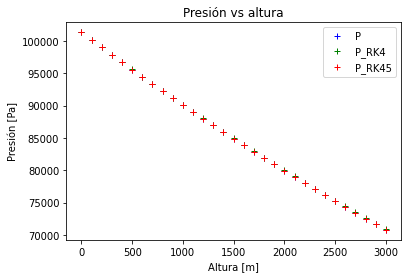

In [60]:
"""
Lineas de código que calcúlan el error de las aproximaciones y grafica P vs Y para cada uno de los métodos.
"""
x, y = DatosVerdaderos(intervalo_y,Presion)
rk45 = ode.solve_ivp(Der_Presion,[y_Ini,y_Final],[p_Ini], method="RK45", t_eval=intervalo_y)
rk4 = RK4(Der_Presion,intervalo_y,p_Ini)
diccionario = {"Valor":y,"RK4":rk4,"%Error RK4":abs(rk4-y)/y*100,"RK45":rk45.y[0],"%Error RK45":abs(rk45.y[0]-y)/y*100}
tabla = pd.DataFrame(diccionario)
print(tabla)
plt.xlabel("Altura [m]")
plt.ylabel("Presión [Pa]")
plt.title("Presión vs altura")
plt.plot(x,y, "+b")
plt.plot(x,rk4,"+g")
plt.plot(x,rk45.y[0], "+r")
plt.legend(["P","P_RK4", "P_RK45"], fontsize=10)






# Cuarta parte, análisis y discución de resultados.

La principal dificultad del código se encuentra en la aritmética de la implementación del método RK4, esto debido a que si no se tiene el cuidado adecuado se obtienen resultados erróneos. 

Dejando esto de lado podemos ver de la tabla de resultados que se obtuvieron muy buenas aproximaciones por parte de ambos métodos al compararlos con los valores verdaderos. Sin embargo el método RK45 tiene porcentajes de error más bajos que el método RK4 implementado, esto se explica debido a que el método RK45 es una mejora al método RK4 dado a que los intervalos h varían para reducir el error.

De esta forma viendo que el porcentaje de error del método RK45 es $2.130665e-05$ % podemos ver que en realidad no hay una necesidad de encontrar la solución analítica dado a que el valor aproximado es muy exacto. 

Al graficar las tres curvas (analítica, RK4, RK45) podemos ver que las diferencias son tan pequeñas que parece que solo se tiene una curva cuando en realidad se tienen tres, esto nos muestra de manera gráfica la efectividad de los métodos implementados.

Por último el modelo físico implementado parce ser correcto para alturas pequeñas sin embargo si quisieramos un modelo más general deberíamos analizar como cambia $M$, $g$, $T$ para alturas más grandes al igual que considerar un modelo más complejo que el de gas ideal.
